# Unit 5 - Financial Planning

### NOTES
* Registration in Alpaca is not allowed for Canada as country of residence and taxation. Hence, per the direction from the Instructor, Sasanka Panda, I have refered to the historical stock data from Yahoo Finance for this assignment.
* Yahoo Finance doesn't require any keys, so environment variable file not required to be uploaded.
* Installed Yahoo Finance by running the command "pip install yfinance" at the terminal.
* Installed Alpaca Trade API package by running the command "pip install alpaca-trade-api" in the terminal window. This is required since the MCForecastTools library uses Alpaca internally.

In [1]:
# Initial imports
import os
import requests
import json
import pandas as pd
import yfinance as yahooFinance
import datetime
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [2]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [3]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [4]:
# Execute `GET` request with url
response_btc_data = requests.get(btc_url)
response_eth_data = requests.get(eth_url)

In [5]:
# Format data as JSON
btc_data = response_btc_data.json()
eth_data = response_eth_data.json()

# Use json.dumps with argument indent=4 to format data
print("BTC data \n"+json.dumps(btc_data, indent=4)+"\n\n")
print("ETH data \n"+json.dumps(eth_data, indent=4))

BTC data 
{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 19244868,
            "total_supply": 19244868,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 16698.8,
                    "volume_24h": 16820170611,
                    "market_cap": 321395410934,
                    "percentage_change_1h": 0.0638580517431124,
                    "percentage_change_24h": -1.15141842675451,
                    "percentage_change_7d": -1.18663904151623,
                    "percent_change_1h": 0.0638580517431124,
                    "percent_change_24h": -1.15141842675451,
                    "percent_change_7d": -1.18663904151623
                },
                "CAD": {
                    "price": 22685.3198,
                    "volume_24h": 22850201775.0435,
       

In [6]:
# Fetch current BTC price
btc_price = btc_data['data']['1']['quotes']['CAD']['price']

# Fetch current ETH price
eth_price = eth_data['data']['1027']['quotes']['CAD']['price']

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $27222.38
The current value of your 5.3 ETH is $8709.47


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [8]:
# Set start and end dates of one year for gathering the historical data of the stocks from Yahoo Finance
start_date = datetime.datetime(2021, 12, 16)
end_date = datetime.datetime(2022, 12, 16)

In [9]:
# Gather the historical data from Yahoo Finance. Store the data into seperate DataFrame for the respective ticker SPY and AGG, for a period of last 1 year.
SPY_df = yahooFinance.download("SPY", start = start_date, end = end_date)
AGG_df = yahooFinance.download("AGG", start = start_date, end = end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [10]:
# Display few sample rows of the AGG DataFrame
AGG_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-16,114.260002,114.480003,114.260002,114.360001,111.779968,7566600
2021-12-17,114.550003,114.680000,114.470001,114.500000,111.916809,7428000
2021-12-20,114.570000,114.610001,114.320000,114.330002,111.750633,7382600
2021-12-21,114.070000,114.320000,113.970001,114.239998,111.662666,12970200
2021-12-22,114.330002,114.349998,114.169998,114.339996,111.760422,6171700


In [11]:
# Display few sample rows of the SPY DataFrame
SPY_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-16,472.570007,472.869995,464.799988,466.450012,457.396515,116568600.0
2021-12-17,461.549988,464.739990,458.059998,459.869995,452.528473,135511600.0
2021-12-20,454.480011,455.399994,451.140015,454.980011,447.716553,107134800.0
2021-12-21,458.609985,463.209991,456.309998,463.059998,455.667572,69806300.0
2021-12-22,462.790009,467.809998,462.579987,467.690002,460.223663,58890200.0


In [12]:
# Reorganize the DataFrames

# Drop the column of Adj Close from the DataFrame, since the Closing value will be used for our analysis and simulation.
AGG_df = AGG_df.drop(columns = "Adj Close").copy()
SPY_df = SPY_df.drop(columns = "Adj Close").copy()

# Rename the column headers of the respective Ticker Dataframes from Camelcasing to all small letter. 
SPY_df.rename(columns = {'Open':'open', 'High':'high', 'Low':'low', 'Close':'close', 'Volume':'volume'}, inplace = True)
AGG_df.rename(columns = {'Open':'open', 'High':'high', 'Low':'low', 'Close':'close', 'Volume':'volume'}, inplace = True)

In [13]:
# Concatenate the ticker DataFrames
df_ticker = pd.concat([AGG_df, SPY_df ],axis=1, keys=["AGG", "SPY"])
# Preview DataFrame
df_ticker.head()

AGG                                                \
                  open        high         low       close    volume   
Date                                                                   
2021-12-16  114.260002  114.480003  114.260002  114.360001   7566600   
2021-12-17  114.550003  114.680000  114.470001  114.500000   7428000   
2021-12-20  114.570000  114.610001  114.320000  114.330002   7382600   
2021-12-21  114.070000  114.320000  113.970001  114.239998  12970200   
2021-12-22  114.330002  114.349998  114.169998  114.339996   6171700   

                   SPY                                                   
                  open        high         low       close       volume  
Date                                                                     
2021-12-16  472.570007  472.869995  464.799988  466.450012  116568600.0  
2021-12-17  461.549988  464.739990  458.059998  459.869995  135511600.0  
2021-12-20  454.480011  455.399994  451.140015  454.980011  107134800.0  
2021-12-21  458.609985  463.209991  456.309998  463.059998   69806300.0  
2021-12-22  462.790009  467.809998  462.579987  467.690002   58890200.0

### Create a DataFrame and store the closing prices of each stock

In [14]:
# Create and empty DataFrame for closing prices
df_closing_prices = pd.DataFrame()

In [15]:
# Pick AGG and SPY close prices into the new Data Frame
df_closing_prices["AGG"] = df_ticker["AGG"]["close"]
df_closing_prices["SPY"] = df_ticker["SPY"]["close"]

In [16]:
# Display few sample rows of the DataFrame
df_closing_prices.head()

,AGG,SPY
Date,,
2021-12-16,114.360001,466.450012
2021-12-17,114.500000,459.869995
2021-12-20,114.330002,454.980011
2021-12-21,114.239998,463.059998
2021-12-22,114.339996,467.690002


### Compute the value in dollars of the current amount of shares and print the results

In [17]:
# Pick AGG current day's close price. This will be the closing price of the last record of the DataFrame.
agg_close_price = df_closing_prices["AGG"][-1]
# Pick SPY current day's close price
spy_close_price = df_closing_prices["SPY"][-1]
# Print AGG and SPY close prices. This will be the closing price of the last record of the DataFrame.
print(f"Current AGG closing price: ${agg_close_price:0.2f}")
print(f"Current SPY closing price: ${spy_close_price:0.2f}")

Current AGG closing price: $99.61
Current SPY closing price: $389.63


In [18]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19481.50
The current value of your 200 AGG shares is $19922.00


### Savings Health Analysis

In [19]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto_savings = my_btc_value + my_eth_value
shares_savings = my_spy_value + my_agg_value

# Create savings DataFrame
# Set the investment types
inv_type = ["crypto", "shares"]

# Set current amount of investment
inv_savings = {
    "amount" : [crypto_savings, shares_savings]
}
# Create the shares DataFrame with index
df_savings = pd.DataFrame(inv_savings, index=inv_type)

# Display savings DataFrame
display(df_savings)

,amount
crypto,35931.852242
shares,39403.500366


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

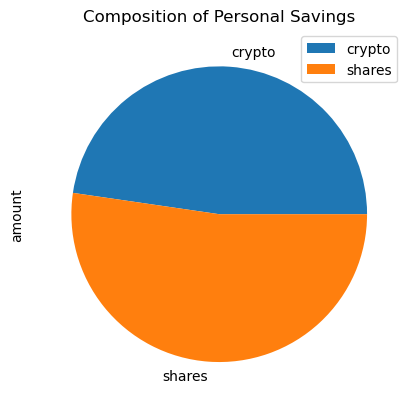

In [20]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [21]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto_savings + shares_savings

# Validate saving health
if total_savings > emergency_fund :
    print(f"Congratulations! You have enough money in your emergency fund.")
elif total_savings == emergency_fund :
    print(f"Congratulations! You have reached your financial goal of your emergency fund.")
elif total_savings < emergency_fund :
    diff = emergency_fund - total_savings
    print(f"You are ${diff:0.2f} away from reaching your financial goal.")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [22]:
# Set start and end dates of five years for gathering the historical data of the stocks from Yahoo Finance
# Sample results may vary from the solution based on the time frame chosen
start_date_5y = datetime.datetime(2017, 12, 16)
end_date_5y = datetime.datetime(2022, 12, 16)

In [23]:
# Get 5 years' worth of historical data for SPY and AGG from Yahoo Finance and store the data into seperate DataFrame for the respective ticker SPY and AGG, of last 5 years.
SPY_df_5y = yahooFinance.download("SPY", start = start_date_5y, end = end_date_5y)
AGG_df_5y = yahooFinance.download("AGG", start = start_date_5y, end = end_date_5y)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [24]:
# Display few sample rows of the AGG DataFrame
AGG_df_5y.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-18,109.470001,109.470001,109.250000,109.330002,97.018044,4474300
2017-12-19,109.139999,109.160004,108.889999,109.010002,96.734100,2820900
2017-12-20,108.750000,108.879997,108.709999,108.760002,96.512230,4002500
2017-12-21,108.760002,108.870003,108.730003,108.820000,96.597443,2374500
2017-12-22,108.820000,108.889999,108.809998,108.870003,96.641830,3292800


In [25]:
# Display few sample rows of the SPY DataFrame
SPY_df_5y.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-18,268.100006,268.600006,267.980011,268.200012,246.243347,83653600.0
2017-12-19,268.480011,268.529999,267.089996,267.170013,245.297653,82382900.0
2017-12-20,268.269989,268.329987,266.690002,267.029999,245.169113,76751500.0
2017-12-21,267.739990,268.390015,267.299988,267.579987,245.674042,67032300.0
2017-12-22,267.600006,267.640015,266.899994,267.510010,245.609772,78720900.0


In [26]:
# Reorganize the DataFrames
# Drop the column of Adj Close from the DataFrame, since the Closing value will be used for our analysis and simulation. 
AGG_df_5y = AGG_df_5y.drop(columns = "Adj Close").copy()
SPY_df_5y = SPY_df_5y.drop(columns = "Adj Close").copy()
# Rename the column headers of the respective Ticker Dataframes from Camelcasing to all small letter. 
SPY_df_5y.rename(columns = {'Open':'open', 'High':'high', 'Low':'low', 'Close':'close', 'Volume':'volume'}, inplace = True)
AGG_df_5y.rename(columns = {'Open':'open', 'High':'high', 'Low':'low', 'Close':'close', 'Volume':'volume'}, inplace = True)

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG_df_5y, SPY_df_5y ],axis=1, keys=["AGG", "SPY"])

# Preview DataFrame
df_stock_data.head()

AGG                                               \
                  open        high         low       close   volume   
Date                                                                  
2017-12-18  109.470001  109.470001  109.250000  109.330002  4474300   
2017-12-19  109.139999  109.160004  108.889999  109.010002  2820900   
2017-12-20  108.750000  108.879997  108.709999  108.760002  4002500   
2017-12-21  108.760002  108.870003  108.730003  108.820000  2374500   
2017-12-22  108.820000  108.889999  108.809998  108.870003  3292800   

                   SPY                                                  
                  open        high         low       close      volume  
Date                                                                    
2017-12-18  268.100006  268.600006  267.980011  268.200012  83653600.0  
2017-12-19  268.480011  268.529999  267.089996  267.170013  82382900.0  
2017-12-20  268.269989  268.329987  266.690002  267.029999  76751500.0  
2017-12-21  267.739990  268.390015  267.299988  267.579987  67032300.0  
2017-12-22  267.600006  267.640015  266.899994  267.510010  78720900.0

In [27]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4, .6],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [28]:
# Printing the simulation input data
MC_dist.portfolio_data.head()

AGG                                               \
                  open        high         low       close   volume   
Date                                                                  
2017-12-18  109.470001  109.470001  109.250000  109.330002  4474300   
2017-12-19  109.139999  109.160004  108.889999  109.010002  2820900   
2017-12-20  108.750000  108.879997  108.709999  108.760002  4002500   
2017-12-21  108.760002  108.870003  108.730003  108.820000  2374500   
2017-12-22  108.820000  108.889999  108.809998  108.870003  3292800   

                                SPY                                      \
           daily_return        open        high         low       close   
Date                                                                      
2017-12-18          NaN  268.100006  268.600006  267.980011  268.200012   
2017-12-19    -0.002927  268.480011  268.529999  267.089996  267.170013   
2017-12-20    -0.002293  268.269989  268.329987  266.690002  267.029999   
2017-12-21     0.000552  267.739990  268.390015  267.299988  267.579987   
2017-12-22     0.000460  267.600006  267.640015  266.899994  267.510010   

                                     
                volume daily_return  
Date                                 
2017-12-18  83653600.0          NaN  
2017-12-19  82382900.0    -0.003840  
2017-12-20  76751500.0    -0.000524  
2017-12-21  67032300.0     0.002060  
2017-12-22  78720900.0    -0.000262

In [29]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\benis\Documents\Beni\UoT\HW\Unit5\FinTech_BC_Unit5_HW\financial_planning-homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992395,0.986448,0.996282,0.996269,1.006256,1.019910,1.006965,0.999489,0.997970,0.996856,...,1.000570,1.002823,1.008366,1.008447,1.000038,1.001562,1.000809,0.995873,1.010761,0.994252
2,0.990226,0.989156,1.006482,0.993309,1.018871,1.030306,1.015117,0.991289,0.979828,0.999922,...,1.008968,1.006770,1.013313,1.015115,1.002835,0.996232,1.003039,0.985494,1.015515,0.997577
3,0.995885,0.995051,1.009319,0.985585,1.014070,1.018947,1.011761,0.997375,0.995787,0.991972,...,1.009780,1.020012,1.001240,1.033716,0.992455,1.005420,0.984707,0.985719,1.027514,0.975672
4,1.001083,0.979023,0.997285,0.985459,1.020585,1.020962,1.015203,0.994534,1.009855,0.985639,...,1.017439,1.012335,0.999632,1.022707,0.984278,1.009495,0.993387,0.988192,1.032769,0.967921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,7.920990,1.624634,2.268090,4.735907,10.157103,4.679794,4.853831,4.346584,9.436717,4.599811,...,2.980721,24.919367,6.414282,5.146679,2.710056,2.807513,1.678298,3.609200,2.658406,1.334998
7557,7.918409,1.645834,2.299512,4.651331,10.134172,4.688044,4.804731,4.389853,9.447092,4.618117,...,2.973994,25.127673,6.321945,5.155198,2.714333,2.810987,1.685442,3.634930,2.623071,1.355403
7558,7.910348,1.644622,2.308771,4.623656,10.186961,4.704135,4.834630,4.441223,9.401644,4.627278,...,2.951019,25.176091,6.313141,5.124857,2.728658,2.805383,1.687468,3.642425,2.616709,1.367005
7559,8.021812,1.650195,2.302293,4.632506,10.303480,4.756073,4.854928,4.397827,9.341559,4.688548,...,2.957922,25.073259,6.247910,5.168973,2.730152,2.820455,1.701237,3.667577,2.632939,1.392461


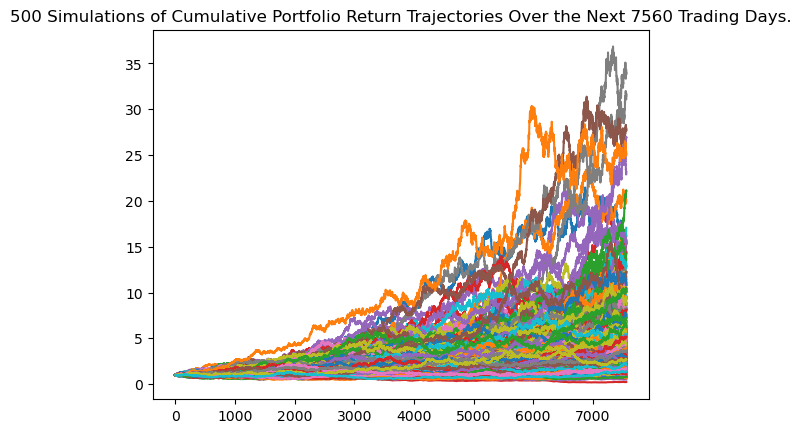

In [30]:
# Plot simulation outcomes
line_plot = MC_dist.plot_simulation() 

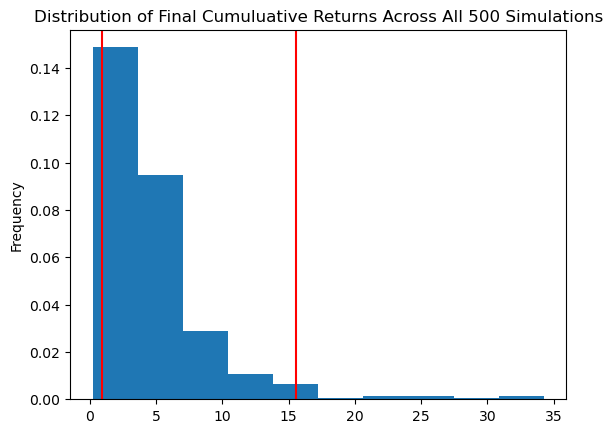

In [31]:
# Plot probability distribution and confidence intervals
dist_plot = MC_dist.plot_distribution()

### Retirement Analysis

In [32]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_dist.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              4.711801
std               4.194339
min               0.228886
25%               2.107148
50%               3.586082
75%               5.519217
max              34.243551
95% CI Lower      0.898269
95% CI Upper     15.557535
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [33]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $17965.38 and $311150.69


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [34]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $26948.08 and $466726.04


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [35]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_dist_five = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4, .6],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [36]:
# Printing the simulation input data
MC_dist_five.portfolio_data.head()

AGG                                               \
                  open        high         low       close   volume   
Date                                                                  
2017-12-18  109.470001  109.470001  109.250000  109.330002  4474300   
2017-12-19  109.139999  109.160004  108.889999  109.010002  2820900   
2017-12-20  108.750000  108.879997  108.709999  108.760002  4002500   
2017-12-21  108.760002  108.870003  108.730003  108.820000  2374500   
2017-12-22  108.820000  108.889999  108.809998  108.870003  3292800   

                                SPY                                      \
           daily_return        open        high         low       close   
Date                                                                      
2017-12-18          NaN  268.100006  268.600006  267.980011  268.200012   
2017-12-19    -0.002927  268.480011  268.529999  267.089996  267.170013   
2017-12-20    -0.002293  268.269989  268.329987  266.690002  267.029999   
2017-12-21     0.000552  267.739990  268.390015  267.299988  267.579987   
2017-12-22     0.000460  267.600006  267.640015  266.899994  267.510010   

                                     
                volume daily_return  
Date                                 
2017-12-18  83653600.0          NaN  
2017-12-19  82382900.0    -0.003840  
2017-12-20  76751500.0    -0.000524  
2017-12-21  67032300.0     0.002060  
2017-12-22  78720900.0    -0.000262

In [37]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_dist_five.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\benis\Documents\Beni\UoT\HW\Unit5\FinTech_BC_Unit5_HW\financial_planning-homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004467,1.011584,0.995116,1.002612,0.992743,1.002439,0.996294,0.999514,0.996440,1.010271,...,1.010544,1.010237,1.006590,0.993695,1.001771,1.006715,1.007105,0.994170,0.984236,0.996789
2,1.009537,1.004099,1.000825,1.016882,0.991546,1.000258,0.988964,0.989705,1.003164,1.015746,...,1.003307,0.998564,1.004972,0.990424,1.013279,1.012149,1.008410,0.995621,0.977062,1.001794
3,1.013576,1.006161,1.003185,0.995497,0.999174,0.994388,0.996241,0.970264,0.998987,1.018603,...,0.986550,0.990577,1.019242,0.993287,1.004733,1.033929,1.003759,0.990420,0.980515,1.006877
4,1.011069,1.016507,0.996751,0.984361,0.998786,0.986106,1.005361,0.979873,1.006027,1.010794,...,0.992543,0.983887,1.010611,1.015890,1.019942,1.042303,1.010603,0.982836,0.971145,1.006525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.332310,1.401428,0.890238,1.296643,1.680260,0.985054,2.339556,0.733305,1.117129,2.015331,...,1.692604,1.778067,0.699245,1.006884,1.130251,1.762361,1.551991,1.610090,0.686976,1.149201
1257,1.336982,1.396038,0.891516,1.313089,1.674153,1.013277,2.332813,0.732516,1.119801,1.982065,...,1.695031,1.783406,0.693095,1.000563,1.142130,1.790103,1.540318,1.611925,0.687612,1.136620
1258,1.351669,1.399024,0.895256,1.294810,1.670950,1.018064,2.332277,0.730347,1.115032,1.959765,...,1.665234,1.793262,0.687900,0.996674,1.145745,1.801419,1.540636,1.610514,0.689123,1.134625
1259,1.357408,1.401031,0.900474,1.307673,1.666686,1.013395,2.317127,0.729048,1.108832,1.953540,...,1.644934,1.794172,0.690748,0.987905,1.158382,1.789964,1.547083,1.606559,0.683683,1.148505


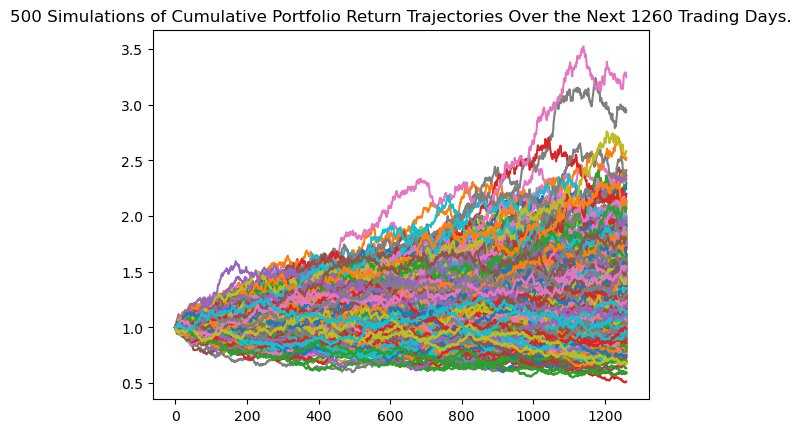

In [38]:
# Plot simulation outcomes
line_plot_five = MC_dist_five.plot_simulation()

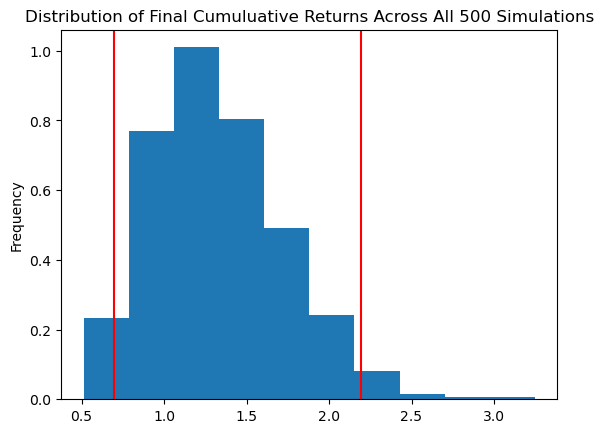

In [39]:
# Plot probability distribution and confidence intervals
dist_plot_five = MC_dist_five.plot_distribution()

In [40]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_five = MC_dist_five.summarize_cumulative_return()

# Print summary statistics
print(tbl_five)

count           500.000000
mean              1.329243
std               0.402962
min               0.514828
25%               1.033147
50%               1.271114
75%               1.580615
max               3.247436
95% CI Lower      0.699936
95% CI Upper      2.191843
Name: 1260, dtype: float64


In [41]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl_five[8]*initial_investment,2)
ci_upper_five = round(tbl_five[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $41996.18 and $131510.61


### Ten Years Retirement Option

In [42]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_dist_ten = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4, .6],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [43]:
# Printing the simulation input data
MC_dist_ten.portfolio_data.head()

AGG                                               \
                  open        high         low       close   volume   
Date                                                                  
2017-12-18  109.470001  109.470001  109.250000  109.330002  4474300   
2017-12-19  109.139999  109.160004  108.889999  109.010002  2820900   
2017-12-20  108.750000  108.879997  108.709999  108.760002  4002500   
2017-12-21  108.760002  108.870003  108.730003  108.820000  2374500   
2017-12-22  108.820000  108.889999  108.809998  108.870003  3292800   

                                SPY                                      \
           daily_return        open        high         low       close   
Date                                                                      
2017-12-18          NaN  268.100006  268.600006  267.980011  268.200012   
2017-12-19    -0.002927  268.480011  268.529999  267.089996  267.170013   
2017-12-20    -0.002293  268.269989  268.329987  266.690002  267.029999   
2017-12-21     0.000552  267.739990  268.390015  267.299988  267.579987   
2017-12-22     0.000460  267.600006  267.640015  266.899994  267.510010   

                                     
                volume daily_return  
Date                                 
2017-12-18  83653600.0          NaN  
2017-12-19  82382900.0    -0.003840  
2017-12-20  76751500.0    -0.000524  
2017-12-21  67032300.0     0.002060  
2017-12-22  78720900.0    -0.000262

In [44]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_dist_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\benis\Documents\Beni\UoT\HW\Unit5\FinTech_BC_Unit5_HW\financial_planning-homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000612,1.004032,0.990329,1.020656,0.993471,1.005900,1.000260,0.991596,0.995298,0.999516,...,0.995142,1.000361,1.009947,1.010631,0.985998,0.987223,1.010577,0.992817,1.001760,1.002654
2,0.996272,1.002615,0.975721,1.015021,1.003091,0.993764,0.997738,1.003479,0.993767,0.990358,...,1.003582,1.000479,1.028196,0.992455,0.969202,0.983500,1.018725,0.982769,1.007066,1.005053
3,0.997493,1.002055,0.980637,1.014591,0.989775,0.994630,0.984275,1.002940,1.001700,0.990864,...,1.000162,1.008953,1.028955,0.988244,0.962019,0.986066,1.028939,0.978012,0.991507,1.012351
4,0.989743,1.007920,0.966256,1.015881,0.994591,0.998940,0.984352,1.008377,1.005888,0.995936,...,0.985578,1.012397,1.043278,0.995722,0.964559,0.987192,1.025138,0.963284,0.990889,1.029046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.178943,1.443725,0.970968,1.325816,0.781607,1.775286,1.698629,2.690603,1.606040,1.864762,...,1.684656,1.414689,2.317390,2.864127,0.798101,1.129850,2.113207,1.410828,1.346811,1.388046
2517,3.156510,1.452129,0.962023,1.326753,0.786862,1.768256,1.707843,2.678693,1.615667,1.871615,...,1.691863,1.411936,2.309257,2.878346,0.810279,1.132874,2.102151,1.421972,1.334032,1.389879
2518,3.150277,1.455124,0.957055,1.318283,0.782672,1.774422,1.701826,2.642951,1.640713,1.886796,...,1.697394,1.422771,2.302743,2.889837,0.810288,1.137673,2.059435,1.421092,1.330750,1.390649
2519,3.137350,1.447486,0.961669,1.306672,0.791456,1.764843,1.708426,2.673231,1.633227,1.873050,...,1.704587,1.441193,2.299192,2.881269,0.808715,1.141063,2.064792,1.423195,1.331257,1.380294


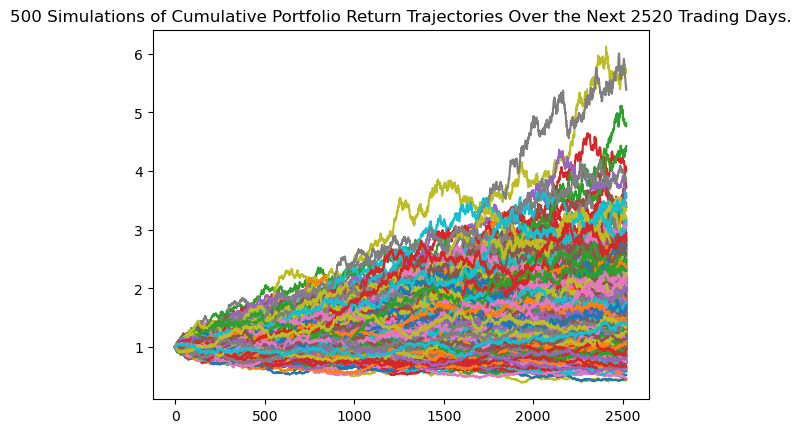

In [45]:
# Plot simulation outcomes
line_plot_ten = MC_dist_ten.plot_simulation()

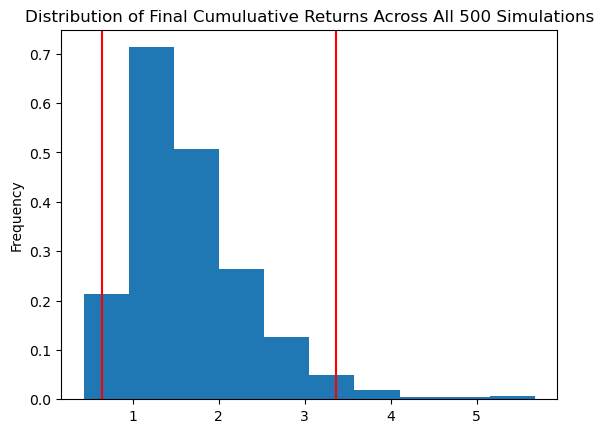

In [46]:
# Plot probability distribution and confidence intervals
dist_plot_ten = MC_dist_ten.plot_distribution()

In [47]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_ten = MC_dist_ten.summarize_cumulative_return()

# Print summary statistics
print(tbl_ten)

count           500.000000
mean              1.645145
std               0.713593
min               0.431953
25%               1.161847
50%               1.500941
75%               1.996326
max               5.677982
95% CI Lower      0.643571
95% CI Upper      3.365211
Name: 2520, dtype: float64


In [48]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl_ten[8]*initial_investment,2)
ci_upper_ten = round(tbl_ten[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $38614.25 and $201912.66
